<h1 style="text-align:center; font-style: times; font-size:32pt; color: Red"> Análise jogo Quina</h1>

Os dados para a quina estão disponíveis de maneira atualizada no próprio site das lotérias, através do [link](https://asloterias.com.br/download-todos-resultados-quina), onde os arquivos estão disponíveis no excel.
A ideia é concorrer na Quina de São João, que será realizada dia 24/06/2019 [vide](https://www.sorteonline.com.br/quina/sao-joao).

[Aqui](http://loterias.caixa.gov.br/wps/portal/loterias/landing/quina/) temos algumas informações que a respeito de como funciona a quina.

<div style="text-align: center">
    Cartela da quina, exemplo
    <img src="https://i0.wp.com/www.jornalprime.com.br/wp-content/uploads/2018/06/cartelaquina.jpg?fit=1280%2C720&ssl=1" alt="cartela_quina" width="500">
    </img>
</div>

<div style="text-align: center">
    Tabela de preços e probabilidades:

<table style="text-align:center; width = 50%; margin: auto;" dir="ltr">
	<caption style="display:none;">Preços e Probabilidades</caption>
	<thead>
		<tr>
			<th rowspan="2">Quantidade de nº jogados</th>
			<th rowspan="2">Valor de aposta</th>
			<th colspan="4">Probabilidade de acerto (1 em...)</th>
		</tr>
		<tr>
			<th>Quina</th>
			<th>Quadra</th>
			<th>Terno</th>
			<th>Duque</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>5</td>
			<td>1,50</td>
			<td>24.040.016</td>
			<td>64.106</td>
			<td>866</td>
			<td>36</td>
		</tr>
		<tr>
			<td>6</td>
			<td>9,00</td>
			<td>4.006.669</td>
			<td>21.658</td>
			<td>445</td>
			<td>25</td>
		</tr>
		<tr>
			<td>7</td>
			<td>31,50</td>
			<td>1.144.763</td>
			<td>9.409</td>
			<td>261</td>
			<td>18</td>
		</tr>
		<tr>
			<td>8</td>
			<td>84,00</td>
			<td>429.286</td>
			<td>4.770</td>
			<td>168</td>
			<td>14</td>
		</tr>
		<tr>
			<td>9</td>
			<td>189,00</td>
			<td>190.794</td>
			<td>2.687</td>
			<td>115</td>
			<td>12</td>
		</tr>
		<tr>
			<td>10</td>
			<td>378,00</td>
			<td>95.396</td>
			<td>1.635</td>
			<td>82</td>
			<td>9</td>
		</tr>
		<tr>
			<td>11</td>
			<td>693,00</td>
			<td>52.035</td>
			<td>1.056</td>
			<td>62</td>
			<td>8</td>
		</tr>
		<tr>
			<td>12</td>
			<td>1.188,00</td>
			<td>30.354</td>
			<td>714</td>
			<td>48</td>
			<td>7</td>
		</tr>
		<tr>
			<td>13</td>
			<td>1.930,50</td>
			<td>18.679</td>
			<td>502</td>
			<td>38</td>
			<td>6</td>
		</tr>
		<tr>
			<td>14</td>
			<td>3.003,00</td>
			<td>12.008</td>
			<td>364</td>
			<td>31</td>
			<td>5,8</td>
		</tr>
		<tr>
			<td>15</td>
			<td>4.504,50</td>
			<td>8.005</td>
			<td>271</td>
			<td>25</td>
			<td>5,2</td>
		</tr>
	</tbody>
</table>

</div>

## Ajustando os dados de entrada

### Pegando o nosso arquivo

In [1]:
# listando os arquivos da pasta
! ls 

analise4982.html  quina_asloterias_ate_concurso_4981_sorteio.xlsx
analise.ipynb	  quina_asloterias_ate_concurso_4982_sorteio.xlsx
preco_quina.html


Vamos importar as bibliotecas para análise, vamos usar o **PODEROSO** [PANDAS](https://pandas.pydata.org/).

<div style="text-align:center">
    Com o Gift De Lei:
</div>
 
 
![](https://media.giphy.com/media/EPcvhM28ER9XW/giphy.gif)

In [2]:
import pandas as pd # analise do dataframe
import numpy as np # analise numérica

Agora vamos transformar nosso arquivo em um _DataFrame_, utilizando o comando `read_excel`, disponível em [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html). 

In [3]:
data = pd.read_excel("quina_asloterias_ate_concurso_4982_sorteio.xlsx")

Vamos dar uma olhada na strutura de nosso `data`.

In [4]:
data.head()

,As Loterias - www.asloterias.com.br - Todos Resultados da Quina,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Este arquivo foi baixado no site www.asloteria...,NaN,NaN,NaN,NaN,NaN,NaN
1,Visite o site para baixar a versão mais atuali...,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TODOS RESULTADOS DA QUINA POR ORDEM DE SORTEIO,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Uhh Parece que temos uma bagunça nas primeira linhas do nosso `data`, mas podemos dar uma organizada nisso ai.

Primeiramente, vamos Para começar, o comando `dropna()` que remove do DataFrame qualquer linha que tenha pelo menos um `NaN`. Caso passemos o argumento `how=’all’`, ele só remove as linhas em que todas as colunas são `NaN`. Para remover colunas, usa-se o mesmo comando, mas passando também o argumento `axis=1`:

In [5]:
# vamos ver o que vamos ter como resultado, com as 10 primeiras linhas
data.dropna().head(10)

,As Loterias - www.asloterias.com.br - Todos Resultados da Quina,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
5,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5
6,4982,23/05/2019,70,2,31,21,60
7,4981,22/05/2019,47,61,35,57,12
8,4980,21/05/2019,50,2,9,35,34
9,4979,20/05/2019,15,68,40,78,61
10,4978,18/05/2019,33,7,32,4,40
11,4977,17/05/2019,66,2,4,43,31
12,4976,16/05/2019,38,17,75,19,30
13,4975,15/05/2019,80,48,76,77,73
14,4974,14/05/2019,30,4,13,50,28


Blz, já temos uma bom começo, vamos atualizar nosso `data`.

In [6]:
data = data.dropna()
data.head(10) #vendo os valores

,As Loterias - www.asloterias.com.br - Todos Resultados da Quina,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
5,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5
6,4982,23/05/2019,70,2,31,21,60
7,4981,22/05/2019,47,61,35,57,12
8,4980,21/05/2019,50,2,9,35,34
9,4979,20/05/2019,15,68,40,78,61
10,4978,18/05/2019,33,7,32,4,40
11,4977,17/05/2019,66,2,4,43,31
12,4976,16/05/2019,38,17,75,19,30
13,4975,15/05/2019,80,48,76,77,73
14,4974,14/05/2019,30,4,13,50,28


Muito bom, mas nossos cabeçalho ainda estão de um jeito muito errado, vemos que nossa primeira linha, ou índice `5`, é o cabeçalho como queremos.

Vamos pegar os valores da nossa linha `5`. Vamos antes disso vamos realocar o valor dos índice, com o `reset_index`

In [7]:
data = data.reset_index()
data.head()

,index,As Loterias - www.asloterias.com.br - Todos Resultados da Quina,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,5,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5
1,6,4982,23/05/2019,70,2,31,21,60
2,7,4981,22/05/2019,47,61,35,57,12
3,8,4980,21/05/2019,50,2,9,35,34
4,9,4979,20/05/2019,15,68,40,78,61


temos um problema, uma coluna a mais que apareceu com o nome 'index', mas podemos excluir ela.

In [8]:
data = data.drop('index',axis=1)
data

,As Loterias - www.asloterias.com.br - Todos Resultados da Quina,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5
1,4982,23/05/2019,70,2,31,21,60
2,4981,22/05/2019,47,61,35,57,12
3,4980,21/05/2019,50,2,9,35,34
4,4979,20/05/2019,15,68,40,78,61
5,4978,18/05/2019,33,7,32,4,40
6,4977,17/05/2019,66,2,4,43,31
7,4976,16/05/2019,38,17,75,19,30
8,4975,15/05/2019,80,48,76,77,73
9,4974,14/05/2019,30,4,13,50,28


Blz, segue o bonde.

Agora o que era linha `5` virou linha `0`. Então vamos receber os valores da linha `0`, através do comando `loc[linha,coluna]` e usar o método `values` para pegar apenas os valores, ou seja os nomes.

In [9]:
nomes = data.loc[0].values
data.loc[0].values

array(['Concurso', 'Data', 'bola 1', 'bola 2', 'bola 3', 'bola 4',
       'bola 5'], dtype=object)

Vamos pegar agora o nome das colunas.

In [10]:
colunas = data.columns
colunas

Index(['As Loterias - www.asloterias.com.br - Todos Resultados da Quina',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [11]:
#criar um dicionário com as colunas e os nomes novos
dic = {}
for i in zip(colunas,nomes):
    dic[i[0]] = i[1]
    
dic

{'As Loterias - www.asloterias.com.br - Todos Resultados da Quina': 'Concurso',
 'Unnamed: 1': 'Data',
 'Unnamed: 2': 'bola 1',
 'Unnamed: 3': 'bola 2',
 'Unnamed: 4': 'bola 3',
 'Unnamed: 5': 'bola 4',
 'Unnamed: 6': 'bola 5'}

Agora temos um dicionário com o padrão `nome antigo:nome novo`, então podemos usar o comando [`rename`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) 

In [12]:
data = data.rename(columns=dic)
data.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5
0,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5
1,4982,23/05/2019,70,2,31,21,60
2,4981,22/05/2019,47,61,35,57,12
3,4980,21/05/2019,50,2,9,35,34
4,4979,20/05/2019,15,68,40,78,61


Sucesso até aqui, agora precisamos excluir a primeira linha, que virou nosso nome das colunas.

In [13]:
data = data.drop(0)
data.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5
1,4982,23/05/2019,70,2,31,21,60
2,4981,22/05/2019,47,61,35,57,12
3,4980,21/05/2019,50,2,9,35,34
4,4979,20/05/2019,15,68,40,78,61
5,4978,18/05/2019,33,7,32,4,40


Ok, agora vamos mudar nossa coluna de índice, já que é bem mais interessante pensar no número do nosso **Concurso** como índice, do que o padrão do pandas.

In [14]:
data = data.set_index('Concurso')
data.head()

,Data,bola 1,bola 2,bola 3,bola 4,bola 5
Concurso,,,,,,
4982,23/05/2019,70,2,31,21,60
4981,22/05/2019,47,61,35,57,12
4980,21/05/2019,50,2,9,35,34
4979,20/05/2019,15,68,40,78,61
4978,18/05/2019,33,7,32,4,40


Vamos deixar salvo este `DataFrame` como `data_c`

In [15]:
data_c = data

Agora, só para deixar o nosso `DataFrame` mais leve, vamos retirar a coluna de Data, já que ela não é relevante para nossa análise, que a priori não é temporal.

In [16]:
data = data.drop('Data', axis=1)
data.head()

,bola 1,bola 2,bola 3,bola 4,bola 5
Concurso,,,,,
4982,70,2,31,21,60
4981,47,61,35,57,12
4980,50,2,9,35,34
4979,15,68,40,78,61
4978,33,7,32,4,40


Eu, particularmente tenho uma problema, quando se trata de valores, então prefiro, fortemente, começar o valor do índice do menor para o maior.

In [17]:
data = data.sort_values(by='Concurso')
data.head()

,bola 1,bola 2,bola 3,bola 4,bola 5
Concurso,,,,,
1,25,45,60,76,79
2,13,30,58,63,64
3,5,15,32,33,48
4,27,57,60,61,77
5,19,44,53,54,71


Agora antes de finalizar o ajuste do DataFrame, vamos ver de que tipo de dados o Pandas está tratando. Agora que temos apenas dados inteiros.

In [18]:
data.dtypes

bola 1    object
bola 2    object
bola 3    object
bola 4    object
bola 5    object
dtype: object

Problema, tipos o tipo `object`, vamos converter tudo para inteiro, com o comando [`astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html).

In [19]:
data = data.astype(int)
data.dtypes

bola 1    int64
bola 2    int64
bola 3    int64
bola 4    int64
bola 5    int64
dtype: object

A parte de engenharia de dados finaliza aqui, nosso DataFrame está bonitinho e ordenado. Agora vamos para análise desses dados.

### Análise dos dados

Já temos o nosso DataFrame bem organizado, então primeiro vamos ver o que o pandas fornece de análise primária com o método [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

In [20]:
data.describe(include='all')

,bola 1,bola 2,bola 3,bola 4,bola 5
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,38.312726,39.333400,41.027499,41.330791,42.357888
std,23.497161,22.953263,22.722735,22.627270,23.387524
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,19.000000,22.000000,22.000000,22.000000
50%,38.000000,39.000000,41.000000,42.000000,43.000000
75%,59.000000,59.000000,60.000000,60.000000,63.000000
max,80.000000,80.000000,80.000000,80.000000,80.000000


Massa, temos algumas ideia sobre nosso dados. Como o valor máximo, devio padrão e os quartis. Tudo dentro dos conformes.

Agora vamos criar um outros DataFrame, agora com os valores da frequência, já que queremos utilizar ele como base para nosso previsão de valores.

Mas primeiramente vamos criar um vetor com as frequências para cada bola.

In [21]:
nomes = list(data.columns[:]) # lista com o nome das colunas sem o valor do concurso 
nomes

['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5']

In [22]:
frequencias = []
for coluna in list(nomes):
    frequencias.append(list(data[coluna].value_counts().sort_index()))

In [23]:
print(frequencias, end=" ")

[[78, 94, 78, 75, 73, 67, 72, 74, 80, 76, 69, 75, 76, 66, 80, 85, 60, 67, 74, 65, 58, 56, 51, 65, 55, 60, 56, 56, 58, 56, 63, 53, 63, 56, 66, 65, 65, 72, 64, 67, 48, 60, 72, 59, 61, 50, 56, 50, 63, 66, 53, 67, 60, 48, 52, 58, 48, 50, 58, 63, 66, 56, 66, 53, 49, 63, 65, 57, 57, 54, 53, 62, 63, 45, 64, 62, 52, 56, 55, 53], [52, 65, 58, 74, 74, 66, 65, 65, 57, 69, 66, 62, 65, 68, 75, 72, 58, 77, 69, 71, 62, 53, 78, 52, 71, 74, 81, 68, 67, 52, 67, 56, 70, 59, 54, 58, 58, 66, 65, 65, 65, 61, 56, 70, 64, 71, 51, 53, 76, 59, 69, 63, 59, 58, 67, 65, 52, 57, 57, 59, 54, 51, 53, 66, 55, 53, 52, 51, 56, 73, 61, 65, 56, 47, 61, 58, 64, 56, 61, 53], [55, 59, 47, 71, 50, 48, 60, 59, 63, 62, 47, 48, 67, 53, 73, 63, 65, 56, 67, 55, 61, 65, 53, 63, 53, 62, 65, 67, 74, 55, 77, 55, 58, 60, 58, 77, 80, 64, 72, 79, 61, 61, 62, 72, 64, 68, 60, 69, 65, 78, 59, 72, 61, 63, 69, 65, 65, 54, 60, 49, 66, 59, 64, 62, 55, 68, 55, 48, 53, 64, 55, 64, 81, 66, 67, 52, 60, 53, 76, 71], [62, 45, 40, 69, 65, 59, 51, 57, 

Beleza, agora temos nosso vetor de frequências e nomes, também sabemos que nosso valores variam de 1 à 80. Então podemos construir nosso DataFrame. Temos que escreve nossas frequências como np.array, com 5 colunas, por isso transport a lista.

In [24]:
intervalo = range(1,81)
frequencias = np.array(frequencias).T

In [25]:
frequencias.shape

(80, 5)

In [26]:
# vendo apenas alguns dados iniciais
frequencias[1:4]

array([[94, 65, 59, 45, 45],
       [78, 58, 47, 40, 51],
       [75, 74, 71, 69, 58]])

In [27]:
freq = pd.DataFrame(data=frequencias, columns=nomes, index=intervalo)

In [28]:
freq.head()

,bola 1,bola 2,bola 3,bola 4,bola 5
1,78,52,55,62,56
2,94,65,59,45,45
3,78,58,47,40,51
4,75,74,71,69,58
5,73,74,50,65,67


Agora vamos colunas o nome na coluna de índice

In [29]:
freq = freq.rename_axis("valor_bola",axis=1)
freq.head()

valor_bola,bola 1,bola 2,bola 3,bola 4,bola 5
1,78,52,55,62,56
2,94,65,59,45,45
3,78,58,47,40,51
4,75,74,71,69,58
5,73,74,50,65,67


Até aqui tudo bem, vamos criar uma coluna com a soma de todos as outras, já que a sequência das bolas não influência no nosso resultado, não é mesmo?

Criando a coluna como soma de todas as colunas do DataFrame, atentando para não contar duas vezes a última coluna.

In [30]:
freq['soma'] = 0
for nome in list(freq.columns.values[:-1]):
    freq['soma'] += freq[nome]

In [31]:
freq

valor_bola,bola 1,bola 2,bola 3,bola 4,bola 5,soma
1,78,52,55,62,56,303
2,94,65,59,45,45,308
3,78,58,47,40,51,274
4,75,74,71,69,58,347
5,73,74,50,65,67,329
6,67,66,48,59,66,306
7,72,65,60,51,52,300
8,74,65,59,57,55,310
9,80,57,63,51,68,319
10,76,69,62,63,64,334


Vamos criar uma coluna com o valor normalizado da coluna soma.

In [32]:
freq['normal'] = freq['soma']/sum(freq['soma'])

In [33]:
freq.head()

valor_bola,bola 1,bola 2,bola 3,bola 4,bola 5,soma,normal
1,78,52,55,62,56,303,0.012164
2,94,65,59,45,45,308,0.012365
3,78,58,47,40,51,274,0.011000
4,75,74,71,69,58,347,0.013930
5,73,74,50,65,67,329,0.013208


Sabemos que cada número tem a mesma probabilidade, logo esperamos que a distribuição seja homogênea. Vamos visualizar previamente como está nossa distribuição.

In [34]:
import matplotlib.pyplot as plt #pacote gráfico
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, 
                               AutoMinorLocator) # ticks style

plt.style.use("seaborn-whitegrid") # estilo do gráfico

In [35]:
# carregando o valor dos eixos
x = freq.index.values
y = freq['normal'].values
# valor esperado 1/max(bola)
padrao = np.full(len(x), 1/max(x))

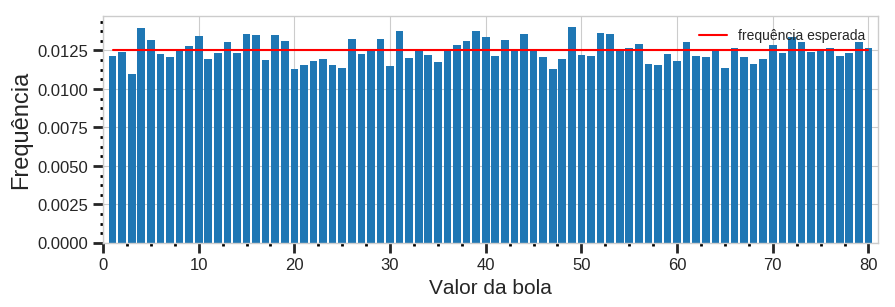

In [36]:
figsize = (10,3) # largura, altura
plt.figure(figsize = figsize, dpi = 100) # definindo figura
ax = plt.axes()
plt.bar(x,y)
plt.plot(x,padrao, label="frequência esperada", color="red")

# labels
ax.set_ylabel("Frequência",fontsize=17) # label y
ax.set_xlabel("Valor da bola",fontsize=15)
plt.legend(loc='best',frameon=False) # localização da legenda

# limites
ax.set_xlim(min(x) -1 ,max(x) + 1) # fixando os limites do eixo x
#ax.set_xlim(max(x),min(x))
start, end = ax.get_xlim() # pegando o limite do grafico
#end, start = ax.get_xlim() # reverse data
plt.xticks(np.arange(start, end + 1, step=10)) # ticks

# style grid
ax.xaxis.grid(True, which = 'major')
ax.yaxis.grid(True, which = 'major')

# ticks
# set ticks
#ax.xaxis.set_minor_locator(MultipleLocator(10)) # input interval to minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4)) # input number subdivision
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

# set style
plt.tick_params(which='both', width=2) # type ticks
plt.tick_params(which='major', length=7) 
plt.tick_params(which='minor', length=2, color='#000000') # minor ticks style
plt.tick_params(labelsize='12') # font numbers

## Abordagem de probabilidade 1 - Bola menos provável

Ok, vamos apostar nos valores menos prováveis, primeiramente vamos pegar todos que estão abaixo do valor esperado.

In [37]:
menos = []
for i in zip(x,y):
    if i[1] < padrao[0]:
        menos.append(i)

Vamos ver, quantos dados foram filtrados nesse primeiro momento:

In [38]:
len(menos)

43

Vamos ordenar a lista do valor de maior probabilidade para o menor:

In [39]:
menos.sort(key=lambda x: x[1], reverse=True)

Agora vamos criar uma nova lista, fazendo o (1- probabilidade), para o valor que mesmo apareceu dentre os dados seja o mais provável de sair.

In [40]:
maximo = menos[0][1]

In [41]:
probabilidades = []
for i in menos:
    probabilidades.append((i[0],1 - i[1]/maximo))

Agora, podemos normalizar a coluna da probabilidades

In [42]:
maximo = probabilidades[-1][1]
maximo

0.11897106109324762

In [43]:
normal = []
for i in probabilidades:
    normal.append((i[0],i[1]/maximo))

Após a normalização vamos tirar o número de probabilidade 0:

In [44]:
print('número: %i probabilidade: %g' % normal[0])
del(normal[0])
print("primeiros valores: \n")
for i in normal[0:10]: print(i)

número: 43 probabilidade: 0
primeiros valores: 

(8, 0.027027027027027684)
(54, 0.027027027027027684)
(2, 0.08108108108108118)
(74, 0.08108108108108118)
(12, 0.10810810810810886)
(14, 0.10810810810810886)
(71, 0.10810810810810886)
(78, 0.10810810810810886)
(6, 0.13513513513513561)
(59, 0.13513513513513561)


Valor ordenar esse nossa lista, para irmos do menor valor da bola para o maior:

In [45]:
normal.sort(reverse=False)

Vamos encontrar os valores para plotar em x e y, agora com nossa nova distribuição:

In [46]:
x = np.array([i[0] for i in normal])
y = np.array([i[1] for i in normal])

Gráfico dos valores

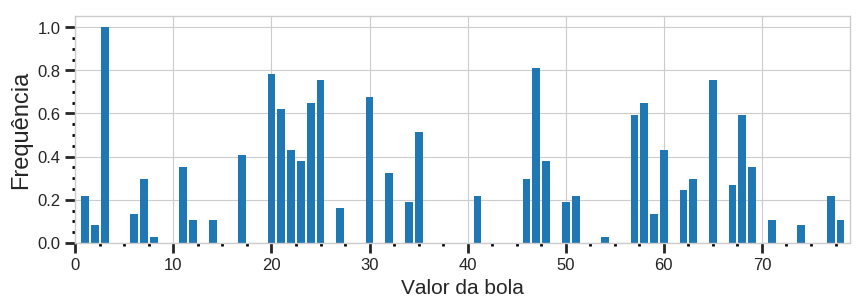

In [47]:
figsize = (10,3) # largura, altura
plt.figure(figsize = figsize, dpi = 100) # definindo figura
ax = plt.axes()
plt.bar(x,y)

# labels
ax.set_ylabel("Frequência",fontsize=17) # label y
ax.set_xlabel("Valor da bola",fontsize=15)

# limites
ax.set_xlim(min(x) -1 ,max(x) + 1) # fixando os limites do eixo x
#ax.set_xlim(max(x),min(x))
start, end = ax.get_xlim() # pegando o limite do grafico
#end, start = ax.get_xlim() # reverse data
plt.xticks(np.arange(start, end + 1, step=10)) # ticks

# style grid
ax.xaxis.grid(True, which = 'major')
ax.yaxis.grid(True, which = 'major')

# ticks
# set ticks
#ax.xaxis.set_minor_locator(MultipleLocator(10)) # input interval to minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4)) # input number subdivision
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

# set style
plt.tick_params(which='both', width=2) # type ticks
plt.tick_params(which='major', length=7) 
plt.tick_params(which='minor', length=2, color='#000000') # minor ticks style
plt.tick_params(labelsize='12') # font numbers

Vamos criar um dicionário onde a `key` é o valor da nossa bola e o valor é sua respectiva probabilidade.

In [48]:
dic = {}
for i in normal:
    dic[i[0]] = i[1]

### Modelo de combinações

Vamos calcular todas as combinações possíveis com esses valores tomados de 5 em 5, com a probabilidade de acerto sendo o produto das probabilidades de cada número. Esse é nosso modelo

In [49]:
from itertools import combinations

combinacoes = list(combinations(x,5))

Vamos ver quantas combinações possíveis temos agora.

In [50]:
len(combinacoes)

850668

Vamos criar um nova lista com uma entrada a mais, onde essa entrada é a probabilidade do nosso conjunto:

In [51]:
lista = []
for i in combinacoes:
    probabilidade = 0
    for j in i:
        probabilidade += dic[j]
    lista.append((i, probabilidade))

Agora vamos ordenar a lista a partir da probabilidade encontrada:

In [52]:
lista.sort(key=lambda x: x[-1], reverse=True)

Agora vamos criar um array com duas entrada, sendo a primeira o número da combinação (ordenado pela probabilidade) e a outra entrada é a própria probabilidade.

In [53]:
sequencia = np.arange(1,len(lista) + 1)
probabilidade = np.array(list([i[-1] for i in lista]))
valor = []
for i in zip(sequencia, probabilidade):
    valor.append(i)
# convert valor em np.array
valor = np.array(valor)

Vamos criar um DataFrame com esses dados

In [54]:
prob = pd.DataFrame(valor, columns=['combinacao','probabilidade'], dtype=np.float64)

In [55]:
prob.head()

,combinacao,probabilidade
0,1.0,4.108108
1,2.0,4.027027
2,3.0,4.027027
3,4.0,4.000000
4,5.0,4.000000


Uma pequena descrição dos dados:

In [56]:
prob.describe()

,combinacao,probabilidade
count,850668.000000,850668.000000
mean,425334.500000,1.808237
std,245566.843733,0.521977
min,1.000000,0.324324
25%,212667.750000,1.432432
50%,425334.500000,1.783784
75%,638001.250000,2.162162
max,850668.000000,4.108108


Como ver esses dados é uma coisa bem legal, vamos ver como sairam nossas combinações.

In [57]:
# eixos
x = prob['combinacao'].values
y = prob['probabilidade'].values

Text(595467.6, 3, 'Combinações = 850668')

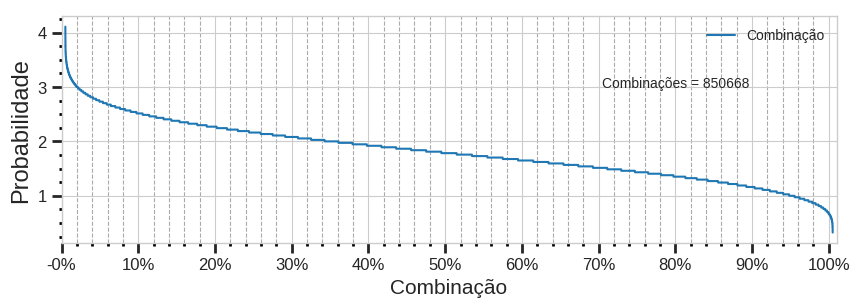

In [58]:
figsize = (10,3) # largura, altura
plt.figure(figsize = figsize, dpi = 100) # definindo figura
ax = plt.axes()
#plt.bar(x,y) # valor x & y
plt.plot(x,y, label="Combinação")

# labels
ax.set_ylabel("Probabilidade",fontsize=17) # label y
ax.set_xlabel("Combinação",fontsize=15)
plt.legend(loc='best',frameon=False) # localização da legenda

# limites
valor = max(x) - min(x)
ax.set_xlim(min(x) - valor/200 ,max(x) + valor/200) # fixando os limites do eixo x
#ax.set_xlim(max(x),min(x))
start, end = ax.get_xlim() # pegando o limite do grafico
#end, start = ax.get_xlim() # reverse data
plt.xticks(np.arange(start, end, step=valor/10)) # ticks

# style grid
ax.xaxis.grid(True, which = 'major')
ax.xaxis.grid(True, which = 'minor', color='#aaaaaa', linestyle='--')
ax.yaxis.grid(True, which = 'major')


# ticks
# set ticks
#ax.xaxis.set_minor_locator(MultipleLocator(10)) # input interval to minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5)) # input number subdivision
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

# set style
plt.tick_params(which='both', width=2) # type ticks
plt.tick_params(which='major', length=7) 
plt.tick_params(which='minor', length=2, color='#000000') # minor ticks style
plt.tick_params(labelsize='12') # font numbers


# percent xtics
import matplotlib.ticker as ticker

ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=max(x)))

plt.text(max(x)*.7, 3, str("Combinações = %i" % max(x)) , fontsize=10)

Muito bonito, temos note que temos algo bem interessante nos valores menores que 2% do total, onde a probabilidade tem um aumento acentuado, maior que **3.2**. Vamos filtram esses dados:

In [59]:
prob = prob[prob.probabilidade > 3.2]
prob.tail(10)

,combinacao,probabilidade
4882,4883.0,3.216216
4883,4884.0,3.216216
4884,4885.0,3.216216
4885,4886.0,3.216216
4886,4887.0,3.216216
4887,4888.0,3.216216
4888,4889.0,3.216216
4889,4890.0,3.216216
4890,4891.0,3.216216
4891,4892.0,3.216216


Reduzimos bastante nossos valores, vamos ver gráficamente, de novo:

In [60]:
# eixos
x = prob['combinacao'].values
y = prob['probabilidade'].values

Text(3424.3999999999996, 3.6972972972972986, 'Combinações = 4892')

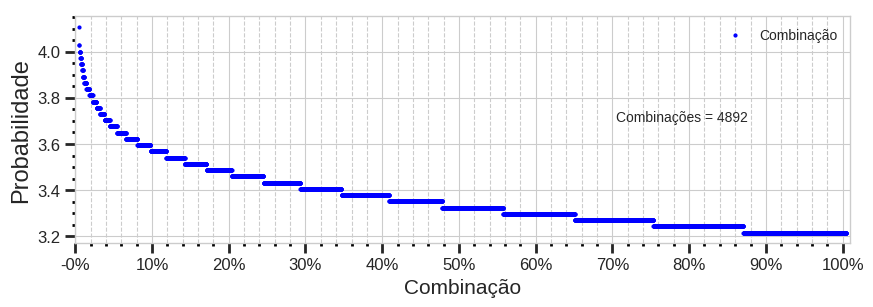

In [61]:
figsize = (10,3) # largura, altura
plt.figure(figsize = figsize, dpi = 100) # definindo figura
ax = plt.axes()
#plt.bar(x,y) # valor x & y
plt.plot(x,y, 'bo', linewidth=0, markersize=2 , label="Combinação") # plotar com pontos

# labels
ax.set_ylabel("Probabilidade",fontsize=17) # label y
ax.set_xlabel("Combinação",fontsize=15)
plt.legend(loc='best',frameon=False) # localização da legenda

# limites
valor = max(x) - min(x)
ax.set_xlim(min(x) - valor/200 ,max(x) + valor/200) # fixando os limites do eixo x
#ax.set_xlim(max(x),min(x))
start, end = ax.get_xlim() # pegando o limite do grafico
#end, start = ax.get_xlim() # reverse data
plt.xticks(np.arange(start, end, step=valor/10)) # ticks

# style grid
ax.xaxis.grid(True, which = 'major')
ax.xaxis.grid(True, which = 'minor', color='#cccccc', linestyle='--')
ax.yaxis.grid(True, which = 'major')


# ticks
# set ticks
#ax.xaxis.set_minor_locator(MultipleLocator(10)) # input interval to minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5)) # input number subdivision
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

# set style
plt.tick_params(which='both', width=2) # type ticks
plt.tick_params(which='major', length=7) 
plt.tick_params(which='minor', length=2, color='#000000') # minor ticks style
plt.tick_params(labelsize='12') # font numbers


# percent xtics
import matplotlib.ticker as ticker

ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=max(x)))

# text
plt.text(max(x)*.7, max(y)*.9, str("Combinações = %i" % max(x)) , fontsize=10)

Temos um comportamento exponencial pelo que parece, mas vamos trabalho com aqueles poucos dados com a probabilidade maior que 3.8, nesses estamos interessados. ;) Então vamos filtrar.

In [62]:
prob = prob[prob.probabilidade > 3.8]
prob.tail(10)

,combinacao,probabilidade
77,78.0,3.810811
78,79.0,3.810811
79,80.0,3.810811
80,81.0,3.810811
81,82.0,3.810811
82,83.0,3.810811
83,84.0,3.810811
84,85.0,3.810811
85,86.0,3.810811
86,87.0,3.810811


Agora temos uma quantidade razoável para analisar a estatística a respeito, voltar as combinações.

In [63]:
final = lista[0:len(prob)]
maximo = final[0][1]

# saida
print("Combinação -->  Probabilidade (normalizada)")
for i in final:
        print(" ".join(map(str, i[0])), "-->", i[1]/maximo)

Combinação -->  Probabilidade (normalizada)
3 20 25 47 65 --> 1.0
3 20 25 30 47 --> 0.980263157894737
3 20 30 47 65 --> 0.980263157894737
3 25 30 47 65 --> 0.9736842105263158
3 20 24 25 47 --> 0.9736842105263156
3 20 24 47 65 --> 0.9736842105263156
3 20 25 47 58 --> 0.9736842105263156
3 20 47 58 65 --> 0.9736842105263156
3 20 21 25 47 --> 0.967105263157895
3 20 21 47 65 --> 0.967105263157895
3 20 25 30 65 --> 0.967105263157895
3 24 25 47 65 --> 0.9671052631578948
3 25 47 58 65 --> 0.9671052631578948
3 21 25 47 65 --> 0.960526315789474
3 20 24 25 65 --> 0.9605263157894738
3 20 25 47 57 --> 0.9605263157894738
3 20 25 47 68 --> 0.9605263157894738
3 20 25 58 65 --> 0.9605263157894738
3 20 47 57 65 --> 0.9605263157894738
3 20 47 65 68 --> 0.9605263157894738
3 20 21 25 65 --> 0.953947368421053
3 25 47 57 65 --> 0.9539473684210528
3 25 47 65 68 --> 0.9539473684210528
3 20 24 30 47 --> 0.9539473684210525
3 20 30 47 58 --> 0.9539473684210525
3 20 21 30 47 --> 0.9473684210526319
3 20 25 57 65 --

Nosso grande campeão, para um jogo com 5 jogos é:

In [64]:
final[0][0]

(3, 20, 25, 47, 65)

Agora para fazer aquele bolão básico, basta procurar os números com maior probabilidade que não pertençam a essa sequência.

In [65]:
normal.sort(key=lambda x: x[1], reverse = True) # ordenando a probabilidade dos números, decrescente

print("bola  --> probabilidade")
print("-----------------------")
for i in normal:
    print(i[0]," -->", i[1])

bola  --> probabilidade
-----------------------
3  --> 1.0
47  --> 0.8108108108108109
20  --> 0.7837837837837841
25  --> 0.7567567567567574
65  --> 0.7567567567567574
30  --> 0.6756756756756762
24  --> 0.6486486486486486
58  --> 0.6486486486486486
21  --> 0.6216216216216227
57  --> 0.5945945945945951
68  --> 0.5945945945945951
35  --> 0.5135135135135138
22  --> 0.4324324324324327
60  --> 0.4324324324324327
17  --> 0.405405405405405
23  --> 0.3783783783783792
48  --> 0.3783783783783792
11  --> 0.3513513513513515
69  --> 0.3513513513513515
32  --> 0.3243243243243238
7  --> 0.297297297297298
46  --> 0.297297297297298
63  --> 0.297297297297298
67  --> 0.2702702702702703
62  --> 0.24324324324324353
1  --> 0.21621621621621678
41  --> 0.21621621621621678
51  --> 0.21621621621621678
77  --> 0.21621621621621678
34  --> 0.18918918918918912
50  --> 0.18918918918918912
27  --> 0.16216216216216237
6  --> 0.13513513513513561
59  --> 0.13513513513513561
12  --> 0.10810810810810886
14  --> 0.108108108

Poderiamos ter economizado um pouco de linhas, mas esse é nosso primeiro resultado.

## Abordagem de probabilidade 2 - Combinações menos frequentes.

In [66]:
# exportar o html
! jupyter nbconvert --to html_ch analise.ipynb

[NbConvertApp] Converting notebook analise.ipynb to html_ch
[NbConvertApp] Writing 604988 bytes to analise.html
